# GitHub Insights

In this notebook, I'll explore the information retrieved about my GitHub repositories and commits.

## Import libraries and data

I'll import the necessary libraries as I'll use the **seaborn** library to plot the insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
repos = pd.read_csv('repos_info.csv')
commits = pd.read_csv('commits_info.csv')

## Basic Analysis

Let's begin by exploring the repos and commit datasets. Then, I'll check the repos on the basis of forks, stars and watchers. Finally, I'll check the commit messages.

In [3]:
print("Total repos till date: {}".format(repos.shape[0]))
print("Total commits till date: {}".format(commits.shape[0]))

Total repos till date: 36
Total commits till date: 408


In [4]:
repos.describe()

,Id,Forks count,Issues count,Stars count,Watchers count
count,3.600000e+01,36.000000,36.0,36.000000,36.000000
mean,1.477609e+08,3.361111,0.0,4.222222,4.222222
std,4.373380e+07,11.097368,0.0,10.978189,10.978189
min,4.966238e+07,0.000000,0.0,0.000000,0.000000
25%,1.263164e+08,0.000000,0.0,0.000000,0.000000
50%,1.685917e+08,1.000000,0.0,1.000000,1.000000
75%,1.755507e+08,3.000000,0.0,3.000000,3.000000
max,1.928580e+08,67.000000,0.0,64.000000,64.000000


From above, I infered the following:
1. I've had maximum forks as 67 while the minimum are 0.
2. The number of watchers and stars go hand in hand.
3. I've had no issues reported in any repository.

In [5]:
print("Two most common commit messages: {}".format(' and '.join(commits['Message'].value_counts().index[:2])))

Two most common commit messages: Update README.md and Initial commit


It appears that sometimes I do tend to update readme files on GitHub itself and use its default message as the commit message.

## Commits per repository

I'll begin by checking how many commits I've done in each repository.

In [6]:
commits_count = pd.DataFrame(pd.merge(repos, 
         commits, 
         left_on='Id', 
         right_on='Repo Id', 
         how = 'left').groupby('Id').size().reset_index())
commits_count.columns = ['Id', 'Commits count']

Next, I'll combine the repos dataset with the commits count to help visualize them.

In [7]:
repos = pd.merge(repos, commits_count, on = 'Id')

Text(0.5,1,'Commits per repository')

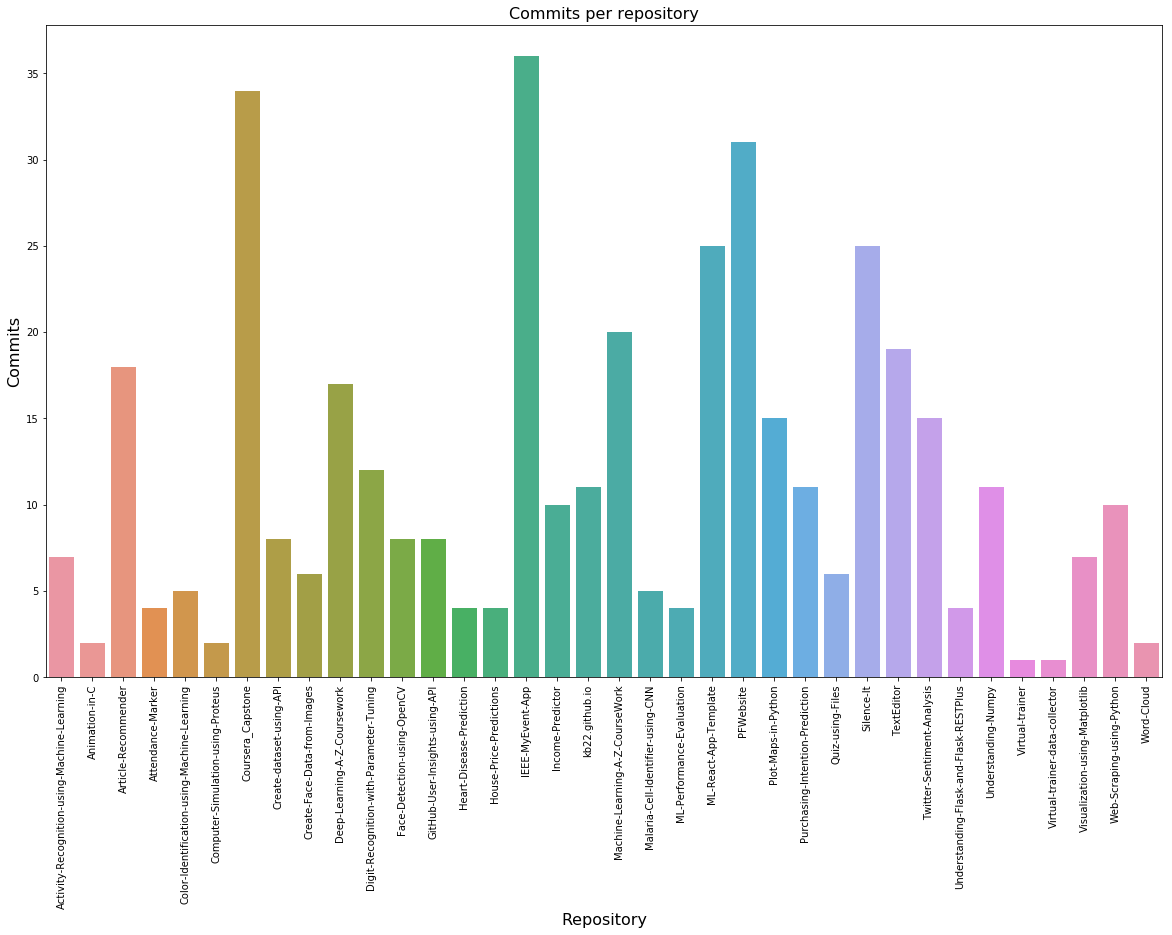

In [8]:
plt.figure(figsize = (20, 12))
sns.barplot(repos['Name'], repos['Commits count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per repository", fontsize = 16)

I've had the maximum commits in **IEEE MyEvent App**, which was an Android application for event management. The second most committed repository is the one associated with **IBM's Applied Data Science Capstone** course called **Coursera_Capstone**.

## Yearly analysis

I'll analyse my yearly stats. I expect to see the maximum commits in the years 2018 and 2019 as I really started working on my own personal projects this time.

In [9]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

Text(0.5,1,'Commits in each year')

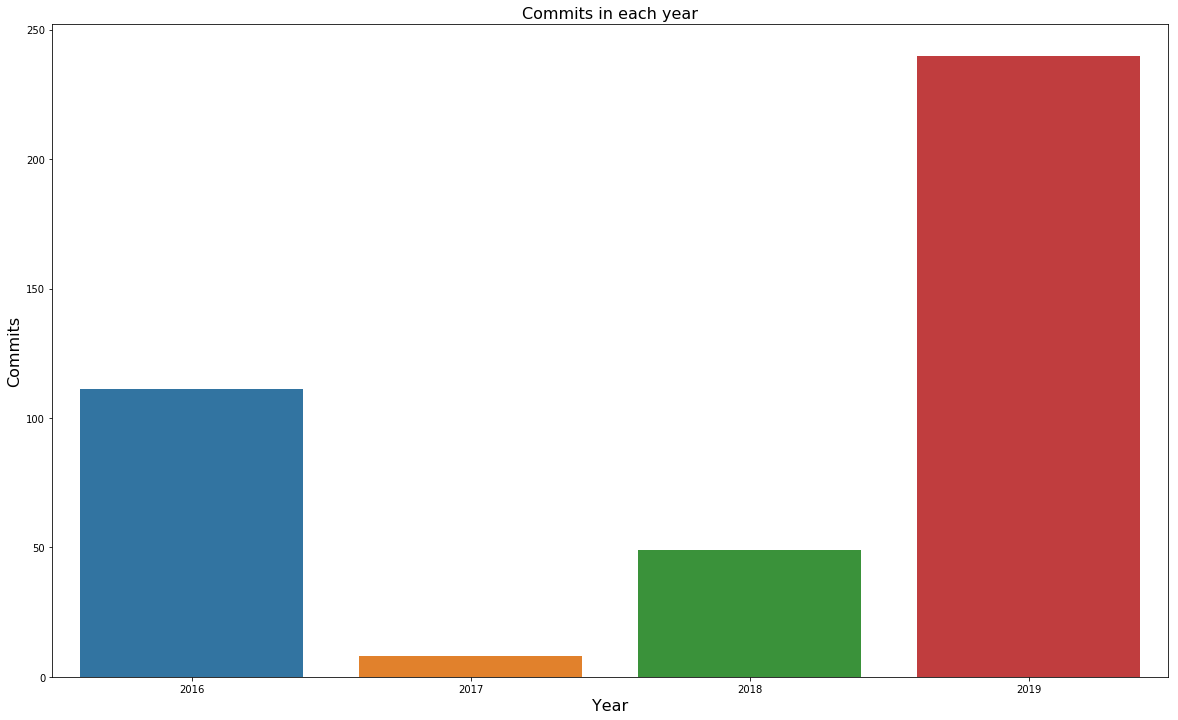

In [10]:
plt.figure(figsize = (20, 12))
sns.barplot(yearly_stats.index, yearly_stats.values)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each year", fontsize = 16)

It appers that I've had the maximum number of commits in the **Year 2019**.

## Monthly commits in 2019

As I observed that the maximum commmits occured in 2019, I'll see their distribution in each month.

In [11]:
commits['Month'] = commits['Date'].apply(lambda x: x.split('-')[1])
monthly_stats = commits[commits['Year'] == '2019'].groupby('Month').count()['Commit Id']

Text(0.5,1,'Commits in each month of 2019')

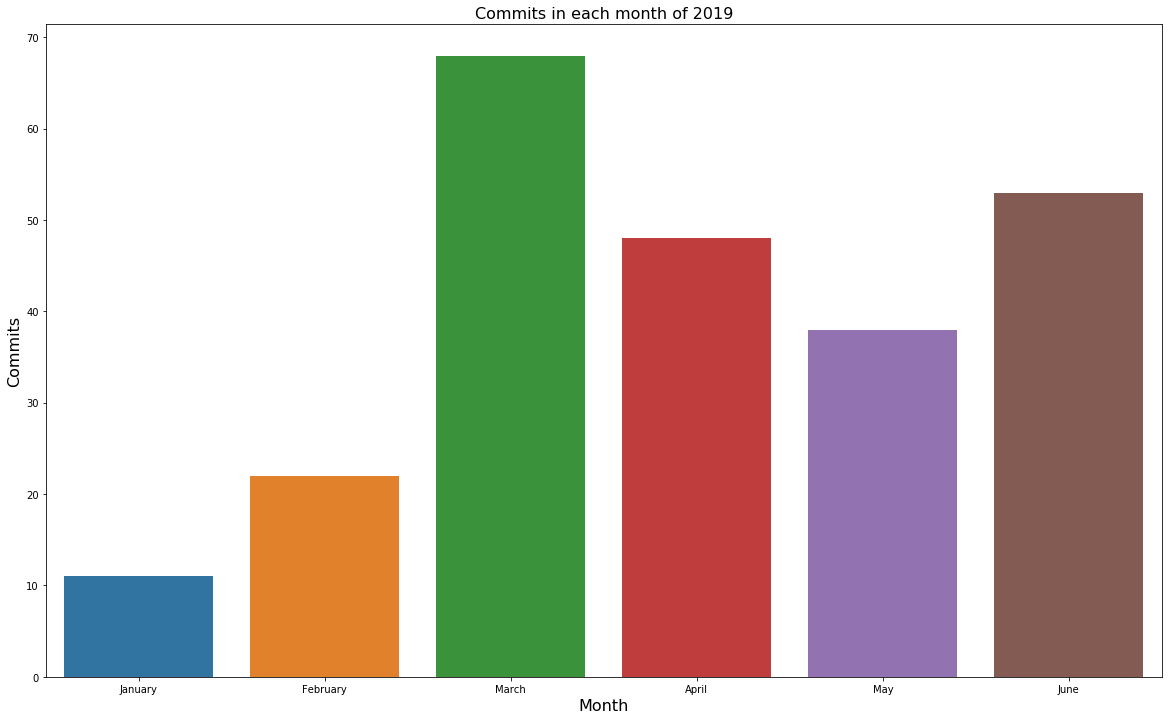

In [12]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June'}
labels = []
for value in monthly_stats.index:
    labels.append(month_mapper[value])

plt.figure(figsize = (20, 12))
plot = sns.barplot(monthly_stats.index, monthly_stats.values)
plt.xlabel("Month", fontsize = 16)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each month of 2019", fontsize = 16)

I've had the **maximum commits** during the month of **March** and **minimum commits** during the month of **January**.

## Everyday commits in March 2019

I'd also like to check the number of commits I've done across each day of 2019.

In [13]:
commits['Date only'] = pd.to_datetime(commits['Date'].apply(lambda date: date.split('T')[0]))
commit_stats = commits[(commits['Year'] == '2019')
                       & (commits['Month'] == '03')]['Date only'].value_counts().sort_index()

Text(0.5,1,'Commits in March, 2019')

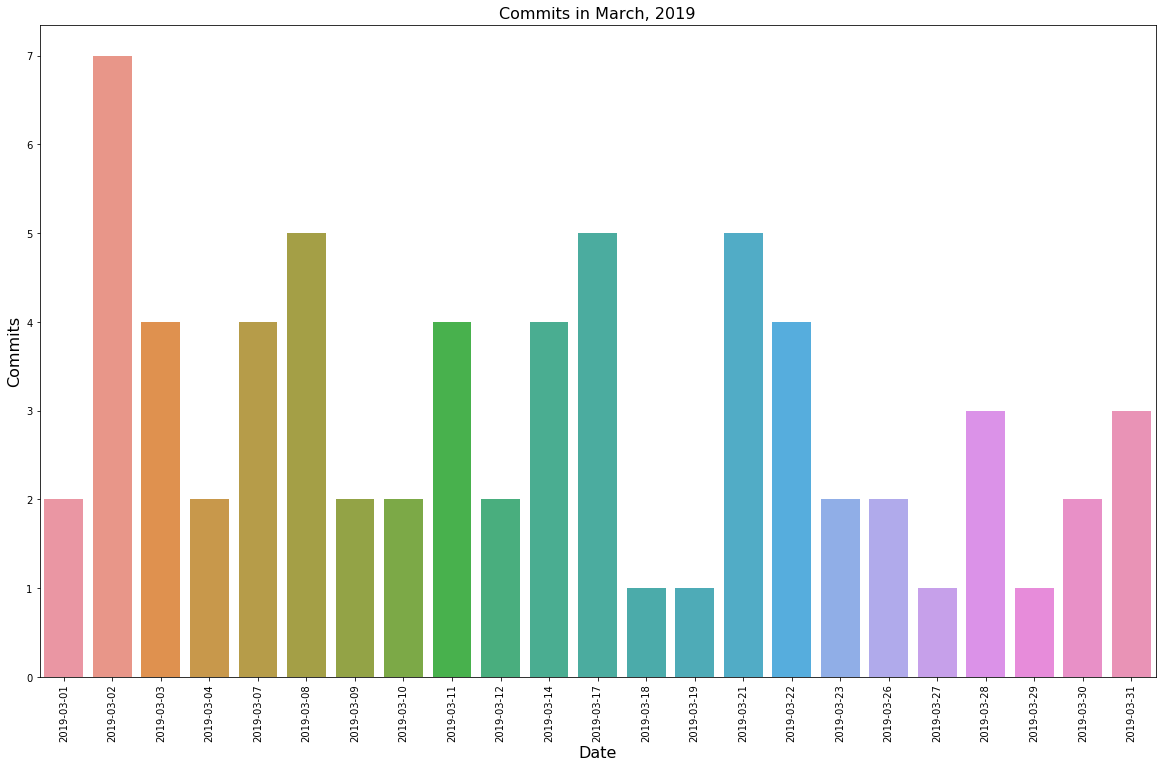

In [14]:
labels = []
for value in commit_stats.index:
    labels.append(value.date())
    
plt.figure(figsize = (20, 12))
plot = sns.barplot(commit_stats.index, commit_stats.values)
plt.xlabel("Date", fontsize = 16)
plt.xticks(rotation = 90)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in March, 2019", fontsize = 16)

I made maximum commits on the **2nd of March 2019**.

## Most popular languages

Next, I'll explore languages that I've used in each repository.

In [15]:
list_of_languages = []
for languages in repos['Languages']:
    if type(languages) == str:
        for language in languages.split(','):
            list_of_languages.append(language.strip())

Text(0.5,1,'Language distribution amongst all repositories')

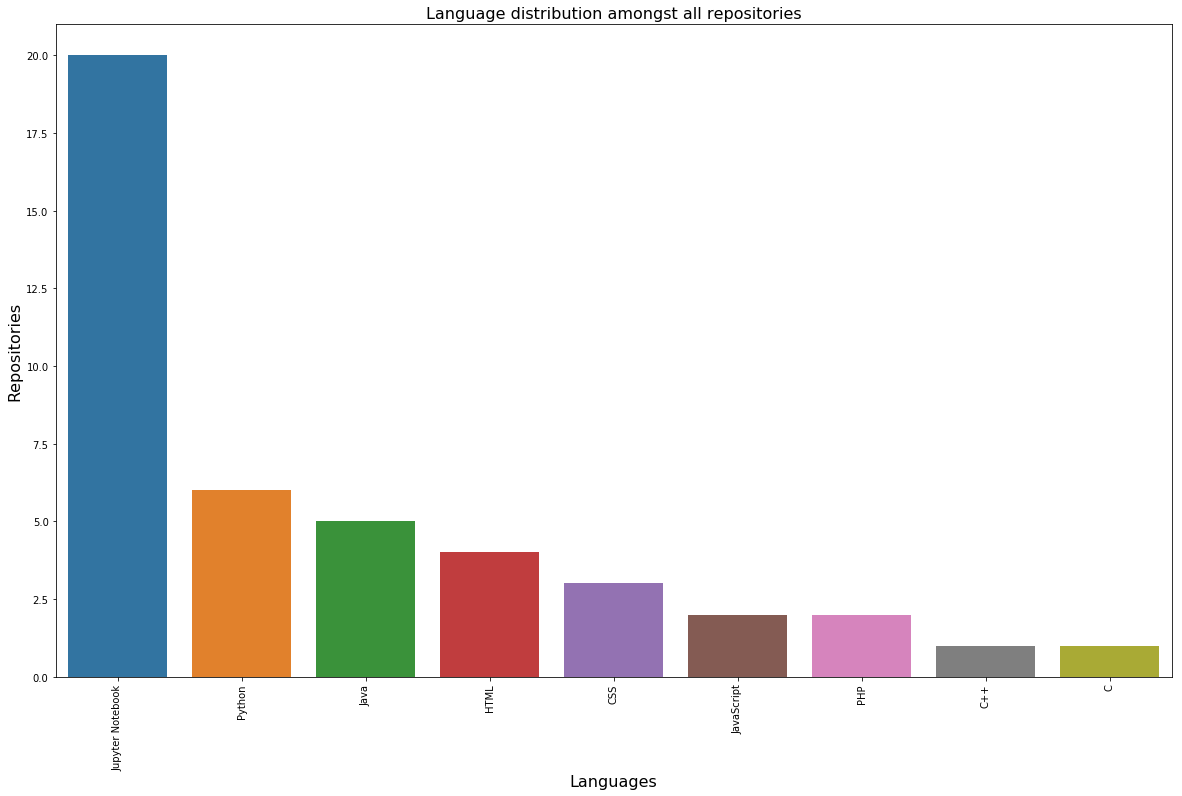

In [16]:
languages_count = pd.Series(list_of_languages).value_counts()

plt.figure(figsize = (20, 12))
sns.barplot(languages_count.index, languages_count.values)
plt.xlabel("Languages", fontsize = 16)
plt.xticks(rotation = 90)
plt.ylabel("Repositories", fontsize = 16)
plt.title("Language distribution amongst all repositories", fontsize = 16)

I've worked on a variety of languages inclduing **HTML**, **C++** and others. However, the most is **Jupyter Notebook** which is mainly working with **Python** in my case.